# Assignment 2

Complete the questions below in any order you like. Remember to commit the changes to GitHub as you go. The total marks for this assignment is 30.

# Question 0 [3 marks]

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub
- You will get marks for the question for using Git (i.e., pushing your assignment to the repository when asked below)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bracketing and bisection method [9 marks]

### Q. 1a [2 marks]
Define a function for the quintic $f(x) = 6 x^5-25 x^4-115 x^3+325 x^2+709 x-420$ and plot it in the range $x=-3.5\dots5.5$

In [12]:
#Defined the function here and added in brackets to make it easier to compute
def f(x):
    return 6*(x**5)-25*(x**4)-115*(x**3)+325*(x**2)+709*(x)-420

In [13]:
# defined x and y and since x is an array it knows to define every element in x into y
x = np.arange(-3.5,5.5,.1)
y = f(x)

Text(0.5, 1.0, 'F(x)')

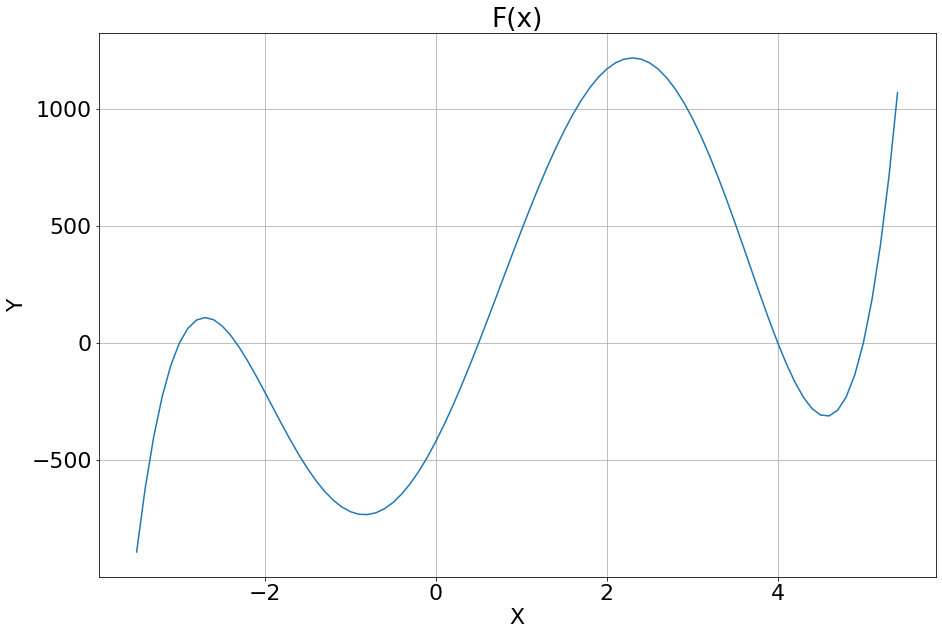

In [14]:
plt.grid(True)
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('F(x)')

### Q. 1b [2 marks]
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.


#### I picked the values $a= -2$ and $b= 2$. I picked $a= -2$ since from the grpah we see that $f(-2)<0$ as $f(-2)= -210$ which is shown below.
#### I picked $b= 2$ since from the graph we can identify that $f(2)>0$ as  $f(2)= 1170$  which is also shown below.
#### We can aslo see that between $(a,b)$ there is a single root in this region which is approximately ($~.5$).

In [15]:
a=-2
b=2

In [16]:
#Printed the f(a) to prove f(a)<0
f(a)

-210

In [17]:
#Printed the f(b) to prove f(b)>0
f(b)

1170

Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [18]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [19]:
#I ran the bisection method to get the root between my selected points
root=FindRootBisection(f,-2,2,1e-12)
print(root)

0.4999999999990905


### Q. 1c [5 marks]
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 3.5$ and $x=4.5$
 - finding the root between $x = 0$ and $x=2$
 - attempting to find a root between $x=6$ and $x=8$ (there is not root in this region)
 
In all cases try to find the root with a tolerance of $10^{-12}$

In [20]:
#I tested out the sign function here 
np.sign(f(3))

1

In [21]:
def FindRootBisectionImproved(f, a, b, tot, printSteps=False):
    left = a
    right = b
    # I added in the if statement in order for code to determine that if the signs of f(a) and f(b)
    # are the same that means there is not root in between
    if (np.sign(f(a))==np.sign(f(b))):
        print('sign(f(',a,'))=sign(f(',b,')) so there is no root between:')
        return a,b
    else:
        while right-left > tot:
            mid = (left+right)/2
            # This if statement tells the code to stop running if the f(midpoint) returns 0
            # so if the midpoint is a root of the function
            if(f(mid)==0):
                return mid
            elif(f(mid) < 0):
                left = mid
            else:
                right = mid
            if(printSteps == True):
                print(mid)
        return mid 

In [22]:
root1=FindRootBisectionImproved(f,3.5,4.5,1e-12)
print(root1)

4.0


In [23]:
root2=FindRootBisectionImproved(f,0,2,1e-12)
print(root2)

0.5


In [24]:
root3=FindRootBisectionImproved(f,6,8,1e-12)
print(root3)

sign(f( 6 ))=sign(f( 8 )) so there is no root between:
(6, 8)


**Commit this question to your git repository and push the changes to GitHub**

# Question 2: Newton-Raphson method [9 marks]

### Q. 2a [3 marks]
 - Define a function $p(x) = x\log(\sqrt{x^2})$. Compute its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-2$ and $x=2$. Label the plot axes and use a grid.
 - By visual inspection state the location of the three roots

#### To compute the derviatve I used the product rule on $p(x) = x\log(\sqrt{x^2})$. 
#### u = x and v = $\log(\sqrt{x^2})$. 
#### Using $\log((x^a)^b)$= $b\log(x^a)$ we can use $1/2\log(x^2)$ and differentaite the function easier this way.
#### We therefore get $1/2\log(x^2)+1$

In [25]:
def p(x):
    return (x*(np.log(np.sqrt(x**2))))
# Here we define our function and the function derivative 
def dp(x):
    return((1/2)*np.log(x**2)+1)

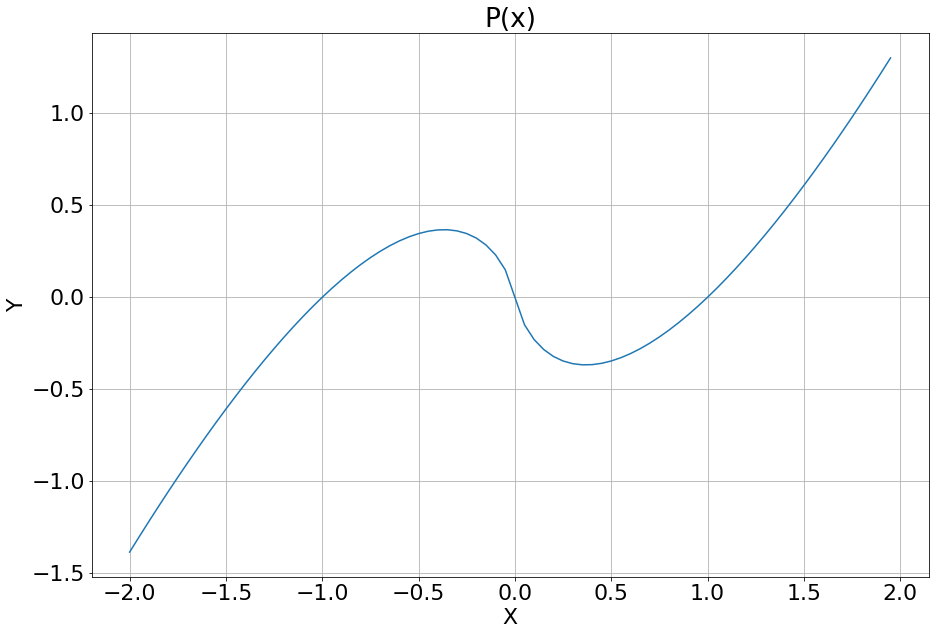

In [26]:
x1 = np.arange(-2,2,.05)
y1 = p(x1)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('P(x)')
plt.grid(True)
plt.plot(x1,y1)

#### The location of the three roots is -1, 0 and 1 as seen by visual inspection.

### Q. 2b [2 marks]
 - Starting with a value $x_0$ near the root at $x=1$ such that $|x_0-1| \ge 0.5$ use the below Newton-Raphson code to find the root to accuracy of $1\times10^{-6}$

In [27]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [28]:
# Here we print out the newton root 
NewtonRoot= FindRootNewtonRaphson(p, dp, 2, 1e-6)
print(NewtonRoot)

1.0


### Q. 2c [4 marks]
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) between $x=-0.2\dots0.2$. Restrict the range on the $y$-axis to be between $-0.5$ and $0.5$. Add labels and a grid.

In [30]:
def F(x):
    return(x-p(x)/dp(x))
# Here we define the two functions
def F2(x):
    return(F(F(x))-x)

(-0.5, 0.5)

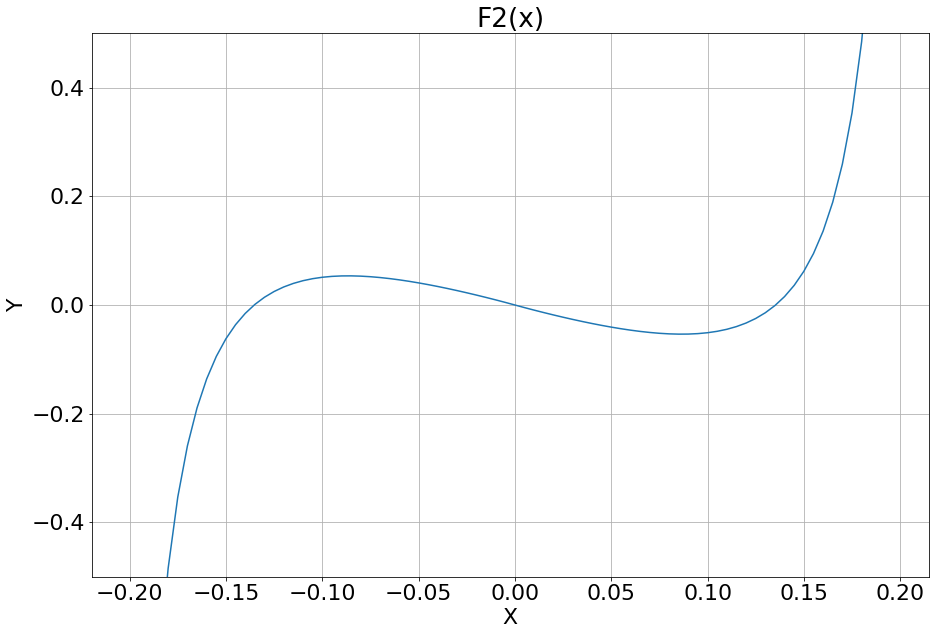

In [31]:
xvalues= np.arange(-.2,.2,.005)
yvalues= F2(xvalues)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('F2(x)')
plt.grid(True)
plt.plot(xvalues,yvalues)
plt.ylim(-.5,.5)

- We want to find a root with $x \neq \{-1,0,1\}$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Using the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and does not converge.

In [33]:
# As seen from the graph above, we can bracket a root between (.1, .15) as there is a root
# between these two parts 
x2= FindRootBisectionImproved(F2,.1,.15,1e-15)
print(x2)

0.13533528323661273


In [34]:
# Using x2 as the argument here we run NewtonRaphson Method and define it as divergex
divergex= FindRootNewtonRaphson(p, dp, x2, 1e-6, printSteps=True)
print(divergex)

x_2 = -0.13533528323661
x_3 = 0.13533528323661
x_4 = -0.13533528323661
x_5 = 0.13533528323661
x_6 = -0.13533528323661
x_7 = 0.13533528323661
x_8 = -0.13533528323661
x_9 = 0.13533528323661
x_10 = -0.13533528323661
x_11 = 0.13533528323661
x_12 = -0.13533528323661
x_13 = 0.13533528323661
x_14 = -0.13533528323661
x_15 = 0.13533528323661
x_16 = -0.13533528323661
x_17 = 0.13533528323661
x_18 = -0.13533528323661
x_19 = 0.13533528323661
x_20 = -0.13533528323661
-0.13533528323661273


#### We see the method above oscillates between -0.135 and +0.135 constantly and does not converge.

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [39]:
# Here we add 10^-3 to the intial guess
divergex1= FindRootNewtonRaphson(p, dp, (x2+1e-3), 1e-6, printSteps=True)
print(divergex1)

x_2 = -0.13734641252178
x_3 = 0.13940274435168
x_4 = -0.14365669284137
x_5 = 0.15277281420573
x_6 = -0.17384186884632
x_7 = 0.23191000128719
x_8 = -0.50261602037117
x_9 = -1.61058113396653
x_10 = -1.09073988553160
x_11 = -1.00357326506197
x_12 = -1.00000634630754
x_13 = -1.00000000002014
x_14 = -1.00000000000000
-1.0


#### We see the when we add $10^-3$ to the initial guess it converges onto the root x=-1

In [40]:
# Here we subtract 10^-3 to the intial guess
divergex2= FindRootNewtonRaphson(p, dp, x2-(1e-3), 1e-6, printSteps=True)
print(divergex2)

x_2 = -0.13334632152318
x_3 = 0.13140085125823
x_4 = -0.12763526695955
x_5 = 0.12057231447083
x_6 = -0.10808759363306
x_7 = 0.08824821801380
x_8 = -0.06181571044994
x_9 = 0.03465787678810
x_10 = -0.01467167593717
x_11 = 0.00455382393268
x_12 = -0.00103689521430
x_13 = 0.00017659727583
x_14 = -0.00002310986987
x_15 = 0.00000238855513
x_16 = -0.00000019996574
x_17 = 0.00000001386233
x_18 = -0.00000000081094
-8.109426700660936e-10


#### Here we see that when subtracting $10^-3$ to the initial guess it converges onto a further out root x=-8.12 which is outside our graph.

**Commit this question to your git repository and push the changes to GitHub**

# Question 3: Slow convergence of the Newton-Raphson method at repeated roots [9 marks]
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x+1)^2(x-2)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots2.5$

#### To derive $g(x) = (x+1)^2(x-2)$ we again use the product rule and define u = $(x+1)^2$ and v = $(x-2)$
#### From the derivation we get $dg(x) = (x+1)^2+2(x+1)(x-2)$

In [42]:
def g(x):
    return ((x+1)**2)*(x-2)
# Here we define the functions g(x) and dg(x)
def dg(x):
    return (((x+1)**2)+2*(x+1)*(x-2))

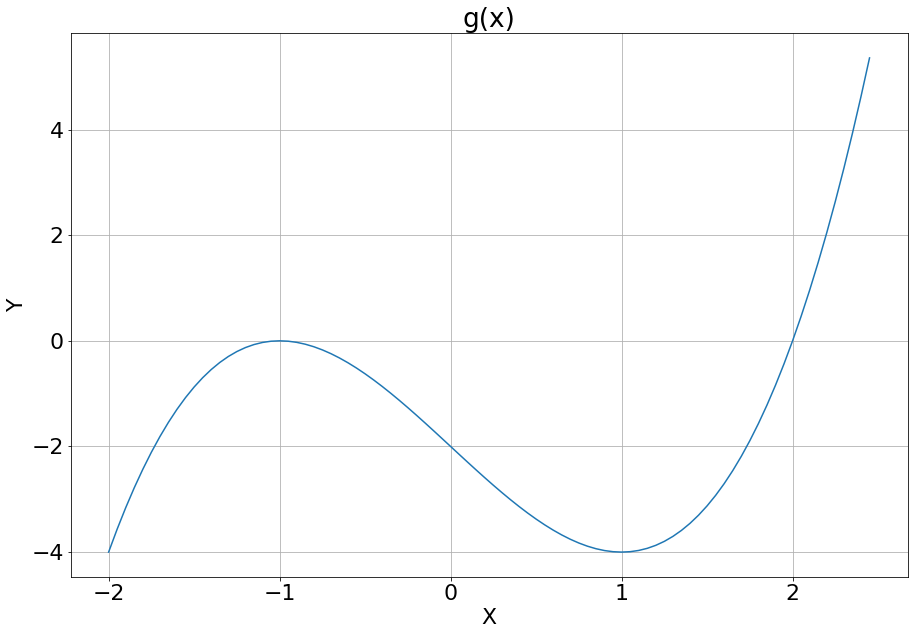

In [43]:
xq3= np.arange(-2,2.5,.05)
yq3= g(xq3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('g(x)')
plt.grid(True)
plt.plot(xq3,yq3)

Run the FindRootNewtonRaphson command with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = -1.5$
 - the initial value of $x_0 = 1.5$

In [31]:
Q3root= FindRootNewtonRaphson(g, dg, -1.5, 1e-6, printSteps=True)
print

x_2 = -1.26666666666667
x_3 = -1.13856209150327
x_4 = -1.07077733565581
x_5 = -1.03579185227111
x_6 = -1.01800080397360
x_7 = -1.00902716353409
x_8 = -1.00452034206070
x_9 = -1.00226186998146
x_10 = -1.00113136084710
x_11 = -1.00056578702802
x_12 = -1.00028292018271


<function print>

In [45]:
Q3root2= FindRootNewtonRaphson(g, dg, 1.5, 1e-6, printSteps=True)
print(Q3root2)

x_2 = 2.33333333333333
x_3 = 2.05555555555556
x_4 = 2.00194931773879
x_5 = 2.00000252829797
x_6 = 2.00000000000426
x_7 = 2.00000000000000
2.0


#### We see that for the initial value set to x=-1.5 it converges slower as it is a repated root as seen on the graph.
#### For the initial value set to x=1.5 we see it converges much faster as it is a single root also seen from the graph.

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [46]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 1.5$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -1.5$. Assign the result to a different variable.

In [47]:
# We define each steps list as we will need them for later on and to be able to visualise it easier
stepsRoot1=FindRootNewtonRaphsonSteps(g, dg, -1.5, 1e-6)
print(stepsRoot1)


[-1.5        -1.26666667 -1.13856209 -1.07077734 -1.03579185 -1.0180008
 -1.00902716 -1.00452034 -1.00226187 -1.00113136 -1.00056579 -1.00028292]


In [48]:
# We also see in this case there is much less steps
stepsRoot2=FindRootNewtonRaphsonSteps(g, dg, 1.5, 1e-6)
print(stepsRoot2)

[1.5        2.33333333 2.05555556 2.00194932 2.00000253 2.
 2.        ]


Plot the absolute difference between the steps and the relevant root, i.e., $|x_n - x_*|$, on a log scale.

[5.00000000e-01 3.33333333e-01 5.55555556e-02 1.94931774e-03
 2.52829797e-06 4.26148006e-12 0.00000000e+00]


<ipython-input-49-ef9d1a4edebe>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(abdiff2))


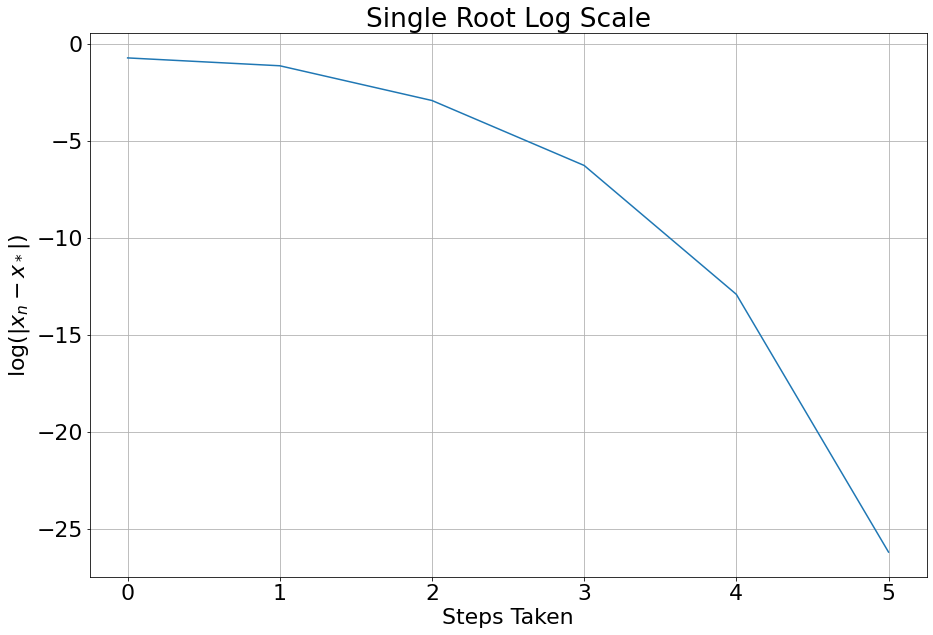

In [49]:
# We use the abs() function to get the absolute number and we take away the root from each step
# In this case we see that the root is x=2
abdiff2=abs(stepsRoot2-2)
print(abdiff2)


plt.title('Single Root Log Scale')
plt.xlabel('Steps Taken')
plt.ylabel('log($|x_n - x_*|$)')
plt.grid(True)
plt.plot(np.log(abdiff2))

[5.00000000e-01 2.66666667e-01 1.38562092e-01 7.07773357e-02
 3.57918523e-02 1.80008040e-02 9.02716353e-03 4.52034206e-03
 2.26186998e-03 1.13136085e-03 5.65787028e-04 2.82920183e-04]


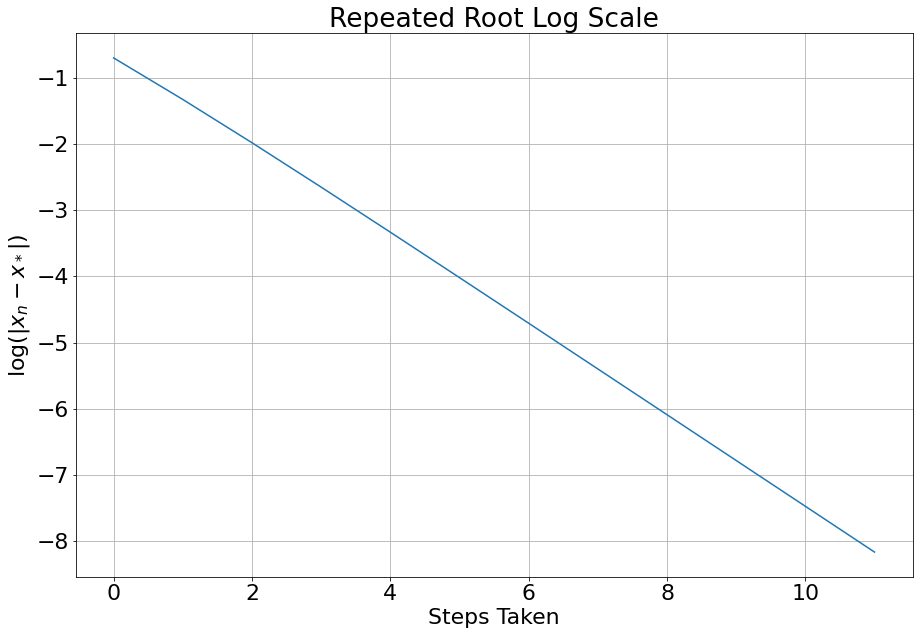

In [50]:
# I define num1 in order to have a --1 easier to read
#In this case we see that the root is x=-1 and we take away the root from each step
num1=-1
abdiff=abs(stepsRoot1-num1)
print(abdiff)

plt.title('Repeated Root Log Scale')
plt.xlabel('Steps Taken')
plt.ylabel('log($|x_n - x_*|$)')
plt.grid(True)
plt.plot(np.log(abdiff))

#### As mentioned we correctly see that for teh root=-1 which we know is a reapeted root the graph is linear on a log scale which basically shows us that it converges slower for each step taken
#### Alternitavely for the single root we see that it converges exponentially as since it is a single root it converges much faster at each step taken and therfore there are less steps taken.

You should find the repeated difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub. Your assignment will be graded directly from GitHub.**